In [1]:
import os
import pandas as pd
os.chdir("/home/admin123/Starspace/")
fp = "/home/admin123/Starspace/"+ "data/Online_Retail.csv"
df = pd.read_csv(fp)
df = df[-df['InvoiceNo'].str.startswith("C")]
df = df[-df['StockCode'].str.startswith("BANK")]
#req_cols = ["CustomerID", "InvoiceNo", "StockCode"]
df = df.dropna()
df["CustomerID"] = df["CustomerID"].astype(int)
#df = df.sort_values(by=['CustomerID'])

In [2]:
df["ItemTotal"] = df["UnitPrice"] * df["Quantity"]

In [3]:
df_inv_summary = df.groupby(["CustomerID","InvoiceNo"]).agg({'ItemTotal': ['sum'], 'Quantity':['sum'], 'StockCode':['count']})

In [4]:
df_freq_cust = df.groupby("CustomerID").agg({'InvoiceNo':['count'], 'ItemTotal':['sum']})

In [6]:
df_freq_cust.describe()

,InvoiceNo,ItemTotal
,count,sum
count,4338.000000,4338.000000
mean,91.727063,2054.228424
std,228.809778,8989.225381
min,1.000000,0.000000
25%,17.000000,307.415000
50%,41.000000,674.485000
75%,100.000000,1661.740000
max,7847.000000,280206.020000


In [12]:
sit = df_freq_cust["ItemTotal"].values

(array([4.303e+03, 1.800e+01, 9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([     0.   ,  28020.602,  56041.204,  84061.806, 112082.408,
        140103.01 , 168123.612, 196144.214, 224164.816, 252185.418,
        280206.02 ]),
 <a list of 10 Patch objects>)

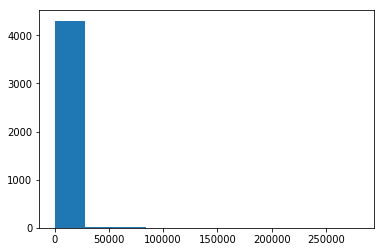

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(sit, bins = 10)